In [1]:
#pip install folium

In [ ]:
#conda install basemap

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from ipywidgets import interact
import pickle
import time
from sklearn.decomposition import PCA
from mpl_toolkits.basemap import Basemap
import folium
# cities = list(df_numeric["city"].unique())
# cities_clean = [i[:i.rfind(',')].strip().lower() if ',' in i else i.strip().lower() for i in cities]

# city_dict = dict(zip(cities, cities_clean))

# df_city = df_numeric.replace({"city": city_dict})

# nums = list(range(1, 737))

# city_dict = dict(zip(cities_clean, nums))

# df_city = df_city.replace({"city": city_dict})

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'stars'}>,
        <AxesSubplot:title={'center':'review_count'}>],
       [<AxesSubplot:title={'center':'is_open'}>, <AxesSubplot:>]],
      dtype=object)

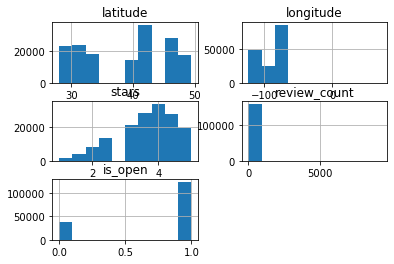

In [3]:
datagraph = pd.read_json('yelp_academic_dataset_business.json',lines = True)
#removed states with no data
dfgraph = datagraph[datagraph.state.isin(["BC","CO","FL","GA","MA","OR","OH","TX","WA"])]
dfgraph.hist()

Text(0.5, 1.0, 'Stars Compared to Average number of Businesses Open')

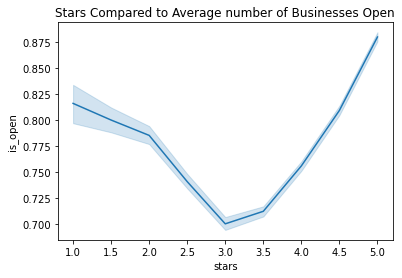

In [4]:
#created graph comparing stars and is_open
sns.lineplot(x="stars", y="is_open",data=dfgraph)
plt.title('Stars Compared to Average number of Businesses Open')

Text(0.5, 1.0, 'Average Businesses Open in Each State')

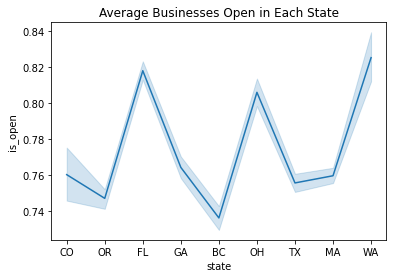

In [5]:
#created graph comparing state and is_open
sns.lineplot(x="state", y="is_open",data=dfgraph)
plt.title('Average Businesses Open in Each State')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


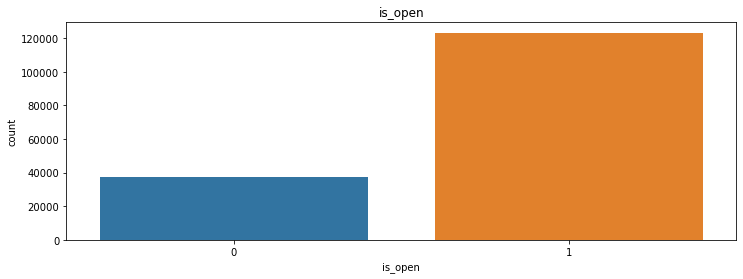

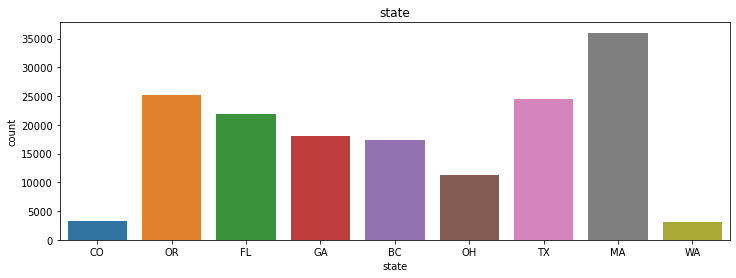

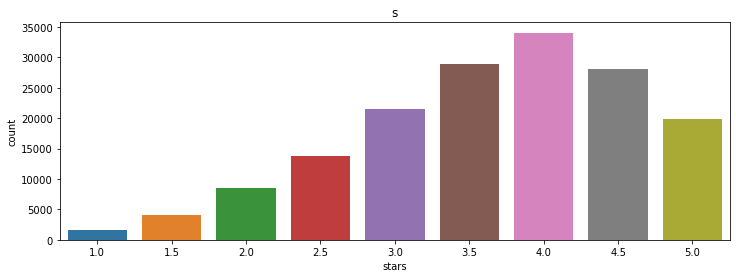

In [6]:
#graph to show total is_open
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['is_open'])
plt.title('is_open');
#graph to show total businesses per state
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['state'])
plt.title('state');

#graph to show total stars given
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['stars'])
plt.title('s');


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


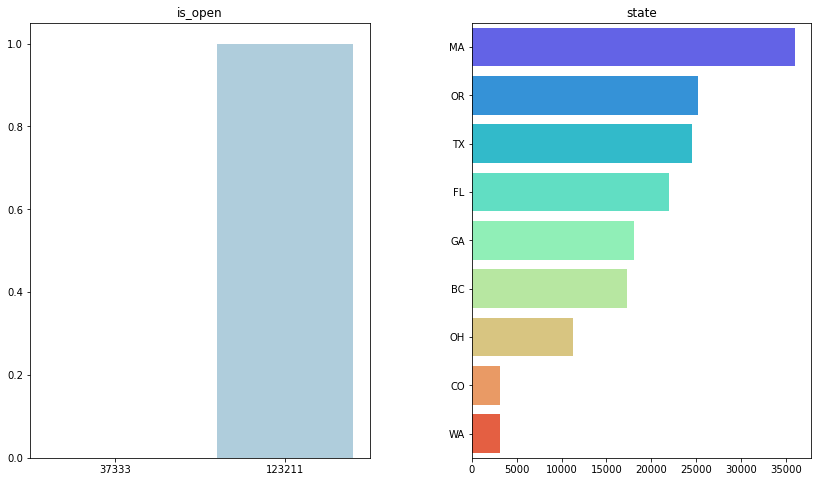

In [7]:
# different type of graph for is_open and state
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = dfgraph['is_open'].value_counts()[:20].to_frame()

sns.barplot(cnt['is_open'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('is_open')

cnt = dfgraph['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('state')
plt.subplots_adjust(wspace=0.3)

In [8]:
# made a folium map of the US showind the total number of is_open per state
import folium
state_geo = 'us-states.json'

map = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(geo_data=state_geo, data=dfgraph,
             columns=['state','is_open'],
             key_on='feature.id',
             fill_color='BuGn', fill_opacity=.7, line_opacity=0.1,
             legend_name='is_open', smooth_factor=0.1,highlight=True).add_to(map)
folium.LayerControl().add_to(map)

map

In [9]:
#used basemap to show a similar map of where our data is located
fig = plt.figure(figsize=(14, 8), edgecolor='w')
m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat= 90,resolution='c',
          lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='Green',lake_color='Blue')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(datagraph['latitude'].tolist(),datagraph['longitude'].tolist())
m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

NameError: name 'Basemap' is not defined

<Figure size 1008x576 with 0 Axes>

In [10]:
#Modeling

In [11]:
data = pd.read_json('yelp_academic_dataset_business.json', lines=True, orient='columns', encoding='utf-8')

In [12]:
df1 = data.mask(data.astype(object).eq('None')).dropna()

df2 = pd.json_normalize(df1['attributes'])
df3 = pd.json_normalize(df1['hours'])

df1 = df1.drop(["attributes", "hours"], axis = 1)

df_concat = pd.concat([df1, df2, df3], axis=1)

In [13]:
df_concat['categories'] = df_concat['categories'].str.lower()
df = df_concat.loc[df_concat.categories.str.contains("restaurant|food|deli|pizza|cafe", na=False)]

In [14]:
df = df.replace(['',' ','NULL'],np.nan)

In [15]:
temp = df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)

In [16]:
temp = temp.dropna(how='any')

In [17]:
temp = temp.drop(["business_id", "name", "address", "categories", "BusinessParking", "city"], axis = 1)
temp = temp[temp.postal_code.apply(lambda x: x.isnumeric())]

In [18]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(temp['state'])
dfx = pd.DataFrame(hashed_features.toarray())
dfx.columns = ['state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5']
# np.count_nonzero(~np.isnan(hashed_features.toarray()))
hashed = pd.concat([temp.reset_index(drop=True), dfx.reset_index(drop=True)], axis=1)
# hashed["BikeParking"] = df["BikeParking"].astype(int)
# hashed["BusinessAcceptsCreditCards"] = (df["BusinessAcceptsCreditCards"]=='True').astype(int)
# hashed[['BikeParking', 'BusinessAcceptsCreditCards']] = (hashed[['BikeParking', 'BusinessAcceptsCreditCards']] == 'True').astype(int)
hashed

,state,postal_code,latitude,longitude,stars,review_count,is_open,BikeParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,...,Thursday,Friday,Saturday,Sunday,state_0,state_1,state_2,state_3,state_4,state_5
0,CO,80302,40.017544,-105.283348,4.0,86.0,1.0,True,True,2,...,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,0.0,0.0,0.0,-1.0,1.0,0.0
1,OR,97218,45.588906,-122.593331,4.0,126.0,1.0,False,True,2,...,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0,0.0,0.0,0.0,1.0,1.0,0.0
2,MA,02128,42.363442,-71.025781,3.5,856.0,1.0,True,True,2,...,7:0-23:0,7:0-0:0,7:0-0:0,7:0-23:0,0.0,0.0,0.0,0.0,2.0,0.0
3,TX,78735,30.234533,-97.877262,4.5,395.0,1.0,True,True,1,...,10:30-21:0,10:30-21:30,10:30-21:30,11:0-21:0,0.0,-1.0,1.0,0.0,0.0,0.0
4,OR,97204,45.518450,-122.675723,3.5,158.0,1.0,True,True,1,...,7:0-23:30,7:0-23:30,7:0-23:30,7:0-23:30,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,GA,30339,33.871911,-84.457859,4.0,141.0,1.0,True,True,1,...,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,0.0,0.0,0.0,1.0,1.0,0.0
10166,MA,02481,42.311216,-71.274680,4.0,286.0,1.0,True,True,2,...,12:0-22:30,12:0-23:0,12:0-23:0,12:0-22:30,0.0,0.0,0.0,0.0,2.0,0.0
10167,TX,78610,30.086646,-97.825035,2.0,29.0,1.0,True,True,2,...,8:0-21:0,7:0-0:0,8:0-22:0,8:0-22:0,0.0,-1.0,1.0,0.0,0.0,0.0
10168,MA,02130,42.322699,-71.103236,3.5,37.0,1.0,True,True,2,...,12:0-20:0,12:0-20:0,12:0-20:0,12:0-20:0,0.0,0.0,0.0,0.0,2.0,0.0


In [19]:
hashed = hashed.drop("state", axis=1)

In [20]:
feature_vectors = hashed.drop("is_open", axis=1)
class_labels = hashed["is_open"]
train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels,random_state=202, test_size=0.25)

In [21]:
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, n_jobs=-1)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set


ValueError: could not convert string to float: 'True'